# **MNIST SGD Classifier Binary Classification with Performance Evaluation**

## Table of Contents
1. [Dataset Description](#introduction)
2. [Data Importing and Visualizing](#data_importing_and_visualizing)
3. [Train/testset Split, Shuffle, Encode](#TSSE)
4. [Model Building](#model_building)
5. [Performance Evaluation](#model_evaluation)
6. [Conclusion](#conclusion)

## Dataset the MNIST Database <a name="introduction"></a>
http://yann.lecun.com/exdb/mnist/
#### The Modified National Institute of Standards and Technology (MNIST) dataset is a large, widely-used collection of handwritten digits used for training and testing various machine learning and image processing systems.
#### The dataset consists of 70,000 black and white images, each measuring 28x28 pixels, representing handwritten digits from 0 to 9. These images are divided into a training set of 60,000 examples and a test set of 10,000 examples. Each image in the MNIST dataset is labeled with the digit it represents, making it an excellent dataset for supervised learning tasks.

## Data Importing and Visualizing <a name="data_importing_and_visualizing"></a>

> #### **Importing MNIST Dataset**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')

In [2]:
len(mnist['data'])

70000

> #### **Visualizing the Dataset**

In [3]:
#Split the data into proper variables
X, y = mnist['data'], mnist['target']

#Count the amount of each number
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[['0' 6903]
 ['1' 7877]
 ['2' 6990]
 ['3' 7141]
 ['4' 6824]
 ['5' 6313]
 ['6' 6876]
 ['7' 7293]
 ['8' 6825]
 ['9' 6958]]


In [4]:
#Helper function for data display
def viz(n):
    plt.imshow(X[n].reshape(28,28))
    return

actual value:0

28*28 pixel visualization:


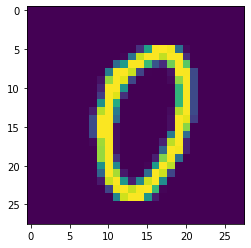

In [5]:
#Comparison 1 with corresponding x and y values
print('actual value:' + y[1000])
print('\n28*28 pixel visualization:')
viz(1000)

actual value:3

28*28 pixel visualization:


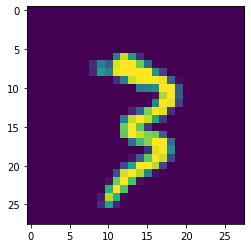

In [6]:
#Comparison 2 with corresponding x and y values
print('actual value:' + y[25000])
print('\n28*28 pixel visualization:')
viz(25000)

## Train/testset Split, Shuffle and Encode <a name="TSSE"></a>

> #### **Data Splitting and Shuffling**

In [7]:
#Split train and test datasets
num_split = 60000
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

#Print the count of each class, check 0 counts in train and test set
unique, counts = np.unique(y_train, return_counts=True)
print('y_train:', np.asarray((unique, counts)).T)
unique, counts = np.unique(y_test, return_counts=True)
print('y_test:', np.asarray((unique, counts)).T)

y_train: [['0' 5923]
 ['1' 6742]
 ['2' 5958]
 ['3' 6131]
 ['4' 5842]
 ['5' 5421]
 ['6' 5918]
 ['7' 6265]
 ['8' 5851]
 ['9' 5949]]
y_test: [['0' 980]
 ['1' 1135]
 ['2' 1032]
 ['3' 1010]
 ['4' 982]
 ['5' 892]
 ['6' 958]
 ['7' 1028]
 ['8' 974]
 ['9' 1009]]


In [8]:
#Shuffle the dataset
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#Ensure shuffle had no effect on classes count
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[['0' 5923]
 ['1' 6742]
 ['2' 5958]
 ['3' 6131]
 ['4' 5842]
 ['5' 5421]
 ['6' 5918]
 ['7' 6265]
 ['8' 5851]
 ['9' 5949]]


> #### **Data Encoding**
For the purpose of this project, a binary classifier is trained to identify Zeros and Non-zeros

In [9]:
#Identify the zeros and non-zeros with boolean values
y_train_0 = (y_train == '0')
y_test_0 = (y_test == '0') 

#Display count zeros and non-zeros
unique, counts = np.unique(y_train_0, return_counts=True)
labels = ["Zeros" if u else "Non-Zeros" for u in unique]
print(np.asarray((labels, counts)).T)

[['Non-Zeros' '54077']
 ['Zeros' '5923']]


## Model Building <a name="model_building"></a>

> #### **SGDClassifier Training**

In [10]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0, shuffle = True)
clf.fit(X_train, y_train_0)

SGDClassifier(random_state=0)

> #### **SGDClassifier Prediction Examples**

array([ True])

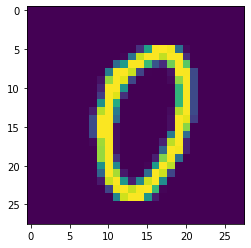

In [11]:
#Prediction exp1
viz(1000)
clf.predict(X[1000].reshape(1, -1))

array([False])

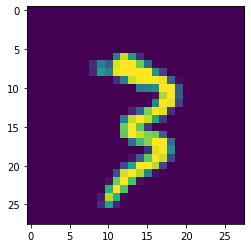

In [12]:
#Prediction exp2
viz(25000)
clf.predict(X[25000].reshape(1, -1))

## Performance Evaluation <a name="model_evaluation"></a>

> #### **Test set performance classification report**

In [13]:
y_test_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test_0, y_test_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      9020
        True       0.97      0.92      0.94       980

    accuracy                           0.99     10000
   macro avg       0.98      0.96      0.97     10000
weighted avg       0.99      0.99      0.99     10000



> #### **Precision recall curve**

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(clf, X_test, y_test_0, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_test_0, y_scores)

In [16]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])    

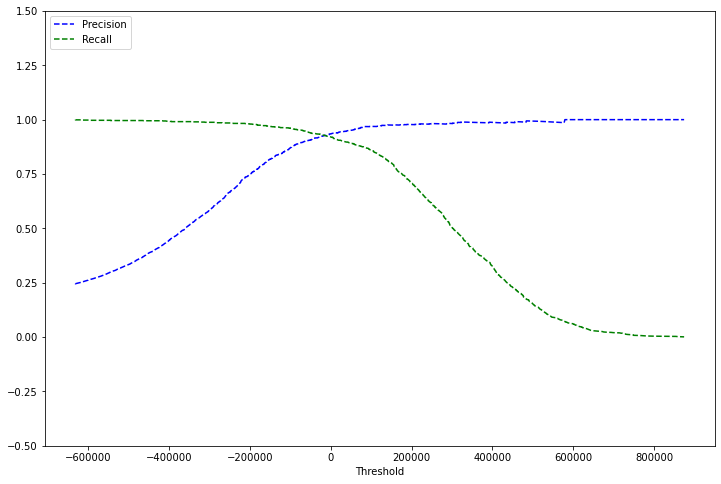

In [17]:
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

There was not a definite purpose for our classification, but ideally the threshold value that gives with the best precision/recall tradeoff for the specific task is selected.

Some tasks may require higher precision (accuracy of positive predictions). 
Some tasks may require higher recall (ratio of positive instances that are correctly detected by the classifier).

> #### **Confusion Matrix**

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
#Generate cross-validated predictions for each instance in the training set
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)

#Display the confusion matrix of training set
pd.DataFrame(confusion_matrix(y_train_0, y_train_pred),
             columns=pd.MultiIndex.from_product([['Prediction'], ["Negative", "Positive"]]),
             index=pd.MultiIndex.from_product([["Actual"], ["Negative", "Positive"]]))

Prediction         
                  Negative Positive
Actual Negative      53748      329
       Positive        447     5476

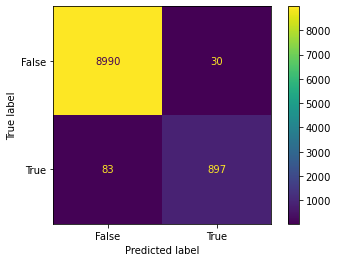

In [20]:
from sklearn.metrics import plot_confusion_matrix

#Confusion matrix of test set
plot_confusion_matrix(clf, X_test, y_test_0)

> #### **K-fold cross-validation**

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
#Display the accuracy for each fold of the cross validation (k=3)
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

array([0.98645, 0.987  , 0.98775])

## Conclusion <a name="conclusion"></a>

> #### **Performance Eval**

#### The **Stochastic Gradient Descent (SGD)** binary classifier displayed overall accuracy of 99% on the MNIST dataset's test set.

#### The model demonstrated strong precision and recall balance.

#### Cross-validation with 3 folds reinforced our model's robust performance, yielding consistent accuracy scores of 98.6%, 98.7%, and 98.8%. 

#### Moving forward, we'll explore strategies to prevent overfitting, such as regularization, early stopping, or further cross-validation with a higher number of folds. Additionally, we'll consider employing different ML models or ensembles for enhanced performance and robustness.


> #### **The Risks of Using Accuracy as a Sole Performance Metric**

In [23]:
1 - sum(y_train_0) / len(y_train_0)

0.9012833333333333

##### A simple check shows that **90.1%** of the images are not zero. Any time you guess the image is not zero, you will be right 90.13% of the time.

##### This is considered a skewed datasets. Because of this, accuracy is generally not the preferred performance measure for classifiers.

##### 